<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/Statistics_of_Discrete_TimeS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd

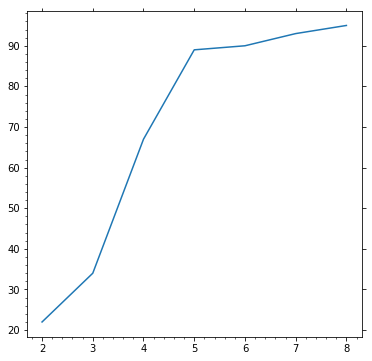

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.plot([2,3,4,5,6,7,8],[22,34,67,89,90,93,95])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os
py_file_location = "/content/drive/My Drive/MS_thesis_work/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
import plotting_fun
import Queue_methods
import Graph_functions
import Stats_EE_recurr_cal as sEE

#Defining function for plotting work

In [ ]:
def scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker="o"):
  fig=plt.figure(figsize=fsize)
  ax = fig.gca()
  plt.scatter(xarr,yarr,s=dotsize, c=None, marker=None, cmap=None, norm=None,
  vmin=None, vmax=None, alpha=opacity, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
def Box_Plot(xrr,xlabel,ylabel,title,label):
  plt.title(title)
  plt.boxplot(xarr,showmeans=True,  labels=label,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
def HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize):
  fig=plt.figure(figsize=fsize)
  ax = fig.gca()
  plt.hist(array, bins=bins, range=None, density=normalized, weights=None, cumulative=False,
  bottom=None, histtype='bar', align=alingm, orientation='vertical', rwidth=width,
  log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid()
def XY_plotting(x,y,xlabel,ylabel,title,linestyle,linewidth,color):
  plt.plot(x,y,ls=linestyle,lw=linewidth,c=color)
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
def plotting_walker_time(degree,TimeS_dict,node):
  #degre=G.degree[a]
  node_timeS=TimeS_dict[node]
  l=np.array(node_timeS)
  #print(l.shape)
  plt.ylim(0,np.max(l[::,1])+10)
  plt.scatter(l[::,0],l[::,1],s=3,c=None, marker=None, cmap=None,
              norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  plt.xlabel("Time(s)")
  plt.ylabel("Number of Walkers")
  plt.title("Variation of Number of walkers with continous\n time on a node of degree "+str(degree))
  #print("total numbers of walkers % passes in time %"%(sum(l[::,0]),max(l[::,1])))
  #plt.yticks([i for i in range(m.ceil(max(l[::,1])))])
  #print(l)
  plt.show()
  #-----------------------------------------
  plt.title('Box plot')
  plt.boxplot(l[::,1],showmeans=True,  labels=None,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel("Number of walkers")
  plt.grid()
  plt.show()

#Function defined for Curve Fitting

In [ ]:
def objective(x, a, b,c):
	return (a * x**b) + c
def curve_fitting(x,y):
  # curve fit
  popt, _ = curve_fit(objective, x, y)
  # summarize the parameter values
  a, b, c= popt
  # plot input vs output
  plt.scatter(x, y,label="simulation")
  # define a sequence of inputs between the smallest and largest known inputs
  x_line = np.arange(min(x), max(x), 1)
  # calculate the output for the range
  y_line = objective(x, a, b,c)
  print("scaling=",a,"exponent=",b,"shifting=",c)
  # create a line plot for the mapping function
  plt.plot(x, y_line, '--', color='red',label="Fitted")
  plt.legend()
  plt.show()

#Retrive Graph details

In [ ]:
adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_Ahmedabad_")
nodes_degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes_same_deg=Graph_functions.nodes_with_same_Degree(nodes_degree_dict)
nodes=len(list(adjacency_list.keys()))
Degrees=list(set(nodes_degree_dict.values()))

In [ ]:
edge_len=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/SG_Edge_length_Ahmedabad_")

In [ ]:
edge_len

In [ ]:
SP=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/SG_wSP_Ahmedabad_")

In [ ]:
sp_lengths=[]
for sp in SP:
  arr=np.array(SP[sp],dtype=int)
  length=arr.size
  s=0
  for i in range(len-1):
    if arr[i]<arr[i+1]:
      s+=edge_len[(arr[i],arr[i+1])]
    else:
      s+=edge_len[(arr[i+1],arr[i])]
  sp_lengths.append(s)


In [ ]:
l=list(set(sp_lengths))

In [ ]:
edge_len_val=edge_len.values()

In [ ]:
degree_dist={i[0]:len(i[1]) for i in nodes_same_deg}
degree_dist

{1: 48, 2: 205, 3: 671, 4: 119, 5: 18, 6: 2, 7: 1}

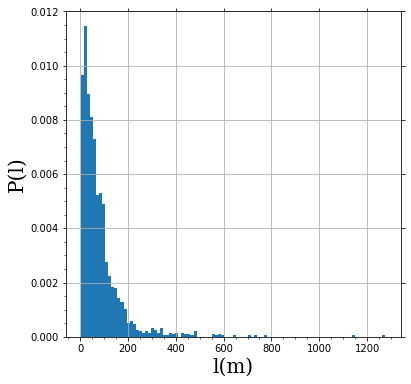

In [ ]:
HistoGram(edge_len_val,100,True,1,"L","P(l)","left","",(6,6)) #HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize)
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 20}
plt.xlabel("l(m)",font)
plt.ylabel("P(l)",font)
plt.show()

In [ ]:
x

array([[0.00984781, 0.04744852, 0.44673232, 0.47269472, 0.01969561,
        0.00358102, 0.        ],
       [0.01739927, 0.09340659, 0.64468864, 0.23626374, 0.00457875,
        0.003663  , 0.        ],
       [0.03734827, 0.23062558, 0.6031746 , 0.11391223, 0.01120448,
        0.00373483, 0.        ],
       [0.04511278, 0.19266917, 0.6306391 , 0.11184211, 0.01691729,
        0.0018797 , 0.00093985]])

#Retriving time series from a file

In [ ]:
TimeS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Time_series_each_node/2D_latticeTS_mat_OutF_2Deg_cap_3Deg_deadP_p2_rejP_1_birP_0.5")
TimeS.shape

(10000, 1000)

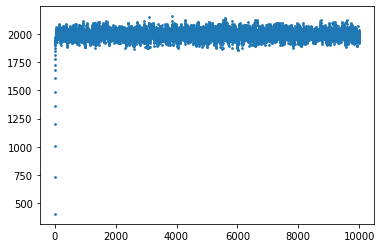

In [ ]:
plt.scatter(np.arange(10000),TimeS.sum(1),s=3)

In [ ]:
TimeS=TimeS[100:,::]
DTime_S={i:TimeS[::,i] for i in range(nodes)}

In [ ]:
def walkers_statistic_node_degreewise(nodes_with_same_degrees,Dtime_series_dict,nodes):
  Avg_walk_nodewise={i:np.mean(np.array(Dtime_series_dict[i])) for i in range(nodes)}
  Std_walk_nodewise={i:np.std(np.array(Dtime_series_dict[i])) for i in range(nodes)}
  Avg_walk_degreewise={i[0]:np.mean(np.array([Avg_walk_nodewise[j] for j in i[1]])) for i in nodes_with_same_degrees}
  Std_walk_degreewise={i[0]:np.mean(np.array([Std_walk_nodewise[j] for j in i[1]])) for i in nodes_with_same_degrees}
  return Avg_walk_nodewise,Std_walk_nodewise,Avg_walk_degreewise,Std_walk_degreewise

def EE_Prob(Nodes,nodes_with_same_degrees,Scaling_factor,DTimeS_each_node,mean_walkers_dic,std_walkers_dic):
  Extreme_event_nodewise={}
  timeS_size=float(np.size(np.array(DTimeS_each_node[0])))
  thresh_hold_Arr={}
  for node in range(Nodes):
    walkers_array=np.array(DTimeS_each_node[node])
    threshold=mean_walkers_dic[node]+Scaling_factor*std_walkers_dic[node]
    thresh_hold_Arr[node]=threshold
    Extreme_event_nodewise[node]=np.count_nonzero((np.where( walkers_array>threshold, 1,0)))/timeS_size
  Extreme_event_prob_degreewise={i[0]:np.mean(np.array([Extreme_event_nodewise[j] for j in i[1]])) for i in nodes_with_same_degrees}
  return thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise
def EE_recurr_Time(Nodes,DTimeS_each_node,nodes_same_degree,threshold_array):
  nodewise_timeDiff={}
  for node in range(Nodes):
    walkers_array=np.array(DTimeS_each_node[node])
    only_time=np.arange(0,walkers_array.size,1,dtype=int)
    threshold=threshold_array[node]
    Extreme_event_points=np.where( walkers_array>threshold,1,0)
    Time_values=np.multiply(Extreme_event_points,only_time)
    exact_time_values=Time_values[np.where(Time_values!=0)]
    arr_size=np.size(exact_time_values)
    if arr_size>1:
      Time_diff=[]
      for i in range(len(exact_time_values)-1):
          Time_diff.append(exact_time_values[i+1]-exact_time_values[i])
      nodewise_timeDiff[node]=np.array(Time_diff)
    elif arr_size==1:
      nodewise_timeDiff[node]=np.inf
    else:
        nodewise_timeDiff[node]=np.nan
  Avg_RecurrT_nodewise={i:np.mean(np.array([nodewise_timeDiff[i]])) for i in range(nodes)}
  Avg_RecurrT_Degwise={i[0]:np.mean(np.array([Avg_RecurrT_nodewise[j] for j in i[1]])) for i in nodes_same_degree}
  return nodewise_timeDiff,Avg_RecurrT_nodewise,Avg_RecurrT_Degwise
def Abs_diff_mag_EE(nodes,nodes_same_degree,DTimeS_each_node,threshold_array):
  nodewise_EE_abs_diff={}
  for node in range(nodes):
    walkers_array=np.array(DTimeS_each_node[node])
    only_time=np.arange(0,walkers_array.size,1,dtype=int)
    threshold=threshold_array[node]
    Extreme_event_values=np.where( walkers_array>threshold,walkers_array,0)
    Exact_EE_values=Extreme_event_values[np.where(Extreme_event_values!=0)]
    arr_size=np.size(Exact_EE_values)
    if arr_size>1:
      EE_abs_diff=[]
      for i in range(len(Exact_EE_values)-1):
            EE_abs_diff.append(abs(Exact_EE_values[i+1]-Exact_EE_values[i]))
      nodewise_EE_abs_diff[node]=np.array(EE_abs_diff)
    elif arr_size==1:
      nodewise_EE_abs_diff[node]=np.inf
    else:
      nodewise_EE_abs_diff[node]=np.nan
  Avg_Abs_diff_mag_EE_nodewise={i:np.mean(np.array([nodewise_EE_abs_diff[i]])) for i in range(nodes)}
  Avg_Abs_diff_mag_EE_degreewise={i[0]:np.mean(np.array([Avg_Abs_diff_mag_EE_nodewise[k] for k in i[1]])) for i in nodes_same_degree}
  return nodewise_EE_abs_diff,Avg_Abs_diff_mag_EE_nodewise,Avg_Abs_diff_mag_EE_degreewise

In [ ]:
city_name="2D_lattice"

In [ ]:
C[i[1] for i in nodes_same_deg]

In [ ]:
Scaling_factor=3.5
df_all=pd.DataFrame()
df_deg=pd.DataFrame()
df_deg['Deg']=np.array(Degrees)
#Computing average and standard deviation of walkers for each node
Avg_walk_node ,Std_walk_node,Avg_walk_deg,Std_walk_deg = walkers_statistic_node_degreewise(nodes_same_deg,DTime_S,nodes)
df_all["mw"] =np.array([Avg_walk_node[i] for i in Avg_walk_node])
df_all["sw"] =np.array([Std_walk_node[i] for i in Std_walk_node])
df_deg["mw"]=np.array([Avg_walk_deg[i] for i in Avg_walk_deg])
df_deg["sw"]=np.array([Std_walk_deg[i] for i in Std_walk_deg])

#Computing EE values for each node
threshold_dict,EEP_nodewise,EEP_degreewise=EE_Prob(nodes,nodes_same_deg,Scaling_factor,DTime_S,Avg_walk_node ,Std_walk_node)
#Computing recurrence time interval
reccT_node_dict,avg_recurrT_node,avg_recurrT_deg = EE_recurr_Time(nodes,DTime_S,nodes_same_deg,threshold_dict)
#Computing absolute difference of magnitude of EE
EE_abs_diff_node_dict,AvgEE_abs_diff_node,AvgEE_abs_diff_deg=Abs_diff_mag_EE(nodes,nodes_same_deg,DTime_S,threshold_dict)

df_deg["EE_P"]=np.array([EEP_degreewise[i] for i in EEP_degreewise])
df_all["th_val"]=np.array([threshold_dict[i] for i in threshold_dict])
df_all["EE_P"]=np.array([EEP_nodewise[i] for i in EEP_nodewise])
df_all["m_recTime"]=np.array([avg_recurrT_node[i] for i in avg_recurrT_node])
df_deg["m_recTime"]=np.array([avg_recurrT_deg[i] for i in avg_recurrT_deg])
df_all["m_absDiff"]=np.array([AvgEE_abs_diff_node[i] for i in avg_recurrT_node])
df_deg["m_absDiff"]=np.array([AvgEE_abs_diff_deg[i] for i in avg_recurrT_deg])
df_all.to_csv(city_name+"EE_stat_Nodewise"+str(0)+"_scaleP_"+str(Scaling_factor))
df_deg.to_csv(city_name+"EE_stat_Degwise_winT_"+str(0)+"_scaleP_"+str(Scaling_factor))

In [ ]:
df_all

,mw,sw,th_val,EE_P,m_recTime,m_absDiff
0,1.298980,1.119584,5.217524,0.002143,468.450000,0.100000
1,1.906020,1.334489,6.576733,0.002347,428.000000,0.636364
2,1.825204,1.320620,6.447375,0.002551,383.333333,0.416667
3,1.749796,1.281123,6.233725,0.001939,426.222222,0.166667
4,1.725408,1.278953,6.201745,0.001633,614.466667,0.266667
...,...,...,...,...,...,...
995,1.718163,1.284109,6.212544,0.001122,781.400000,1.000000
996,1.751224,1.294395,6.281606,0.002551,384.125000,0.166667
997,1.793061,1.298756,6.338709,0.001633,607.466667,0.266667
998,1.917143,1.339994,6.607122,0.001939,483.555556,0.444444


#Distribution of walkers on a node

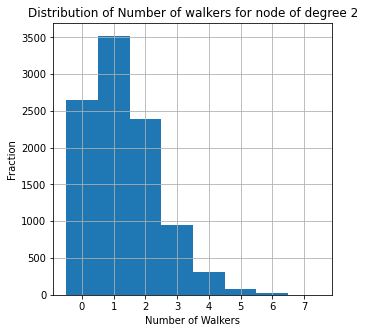

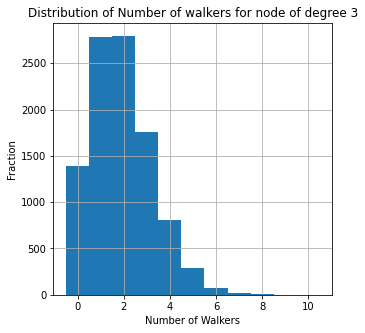

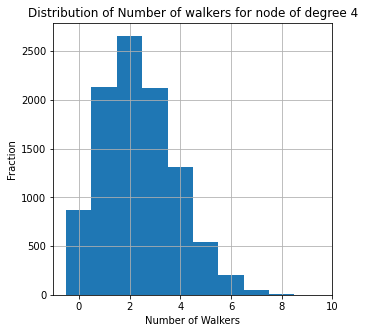

In [ ]:
for i in nodes_with_same_degrees:
  node=i[1][0]
  walkers_arr=np.array(TimeSeries_each_node_dict[node])
  bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
  fsize=(12,8)
  align='left'
  xlabel,ylabel,title="Number of Walkers","Fraction","Distribution of Number of walkers for node of degree "+str(i[0])
  HistoGram(walkers_arr,bins,False,1,xlabel,ylabel,align,title,(5,5))

#Computing average and standard deviation of walkers for each node

In [ ]:
dic_mean_walkers ,dic_std_walkers=sEE.walkers_statistic_nodewise(TimeSeries_each_node_dict,nodes)

#Distribution of Average numbers of walkers computed for all nodes

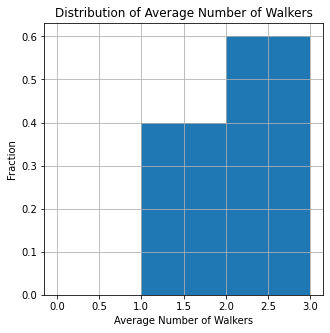

In [ ]:
mean_walkers =np.array([dic_mean_walkers[i] for i in dic_mean_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[i for i in range(0,int(max(mean_walkers))+2)]
xlabel,ylabel,title="Average Number of Walkers","Fraction","Distribution of Average Number of Walkers"
HistoGram(mean_walkers ,bins,True,1,xlabel,ylabel,'mid',title,(5,5))

#Distribution of Standard deviation of numbers of walkers computed for all nodes

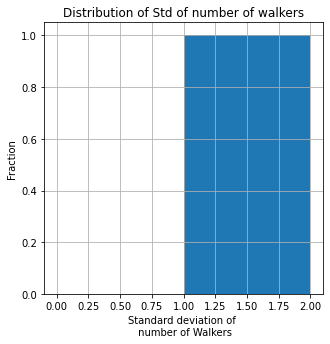

In [ ]:
std_walkers =np.array([dic_std_walkers[i] for i in dic_std_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[i for i in range(0,int(max(std_walkers))+2)]
fsize=(5,5)
xlabel,ylabel,title="Standard deviation of \n number of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(std_walkers,bins,True,1,xlabel,ylabel,'mid',title,fsize)

#Variation of $\sigma$ with $<w>$ computed for all nodes

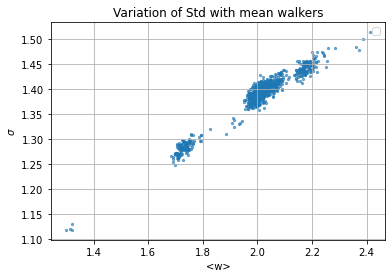

In [ ]:
xarr,yarr=np.array([dic_mean_walkers[i] for i in dic_mean_walkers]),np.array([dic_std_walkers[i] for i in dic_std_walkers])
xlabel,ylabel,title="<w>",r'$ \sigma $',"Variation of Std with mean walkers"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker=".")

In [ ]:
Average_walkers_same_degree=[]
Std_walkers_same_degree=[]
labels=[]
for i in nodes_with_same_degrees:
  x=[dic_mean_walkers[node] for node in i[1]]
  Average_walkers_same_degree.append(x)
  y=[dic_std_walkers[node] for node in i[1]]
  Std_walkers_same_degree.append(y)
  labels.append(str(i[0]))


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


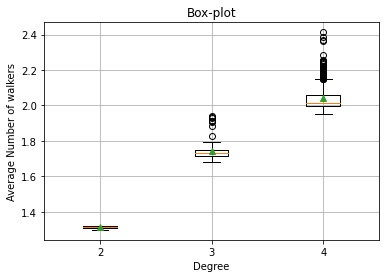

In [ ]:
xlabel,ylabel,title="Degree","Average Number of walkers","Box-plot"
xarr=Average_walkers_same_degree
Box_Plot(xarr,xlabel,ylabel,title,labels)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


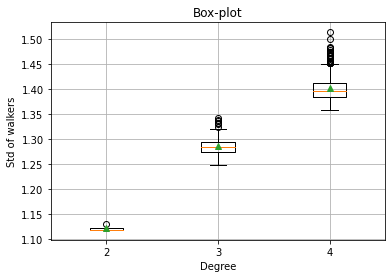

In [ ]:
xlabel,ylabel,title="Degree","Std of walkers","Box-plot"
xarr=Std_walkers_same_degree
Box_Plot(xarr,xlabel,ylabel,title,labels)

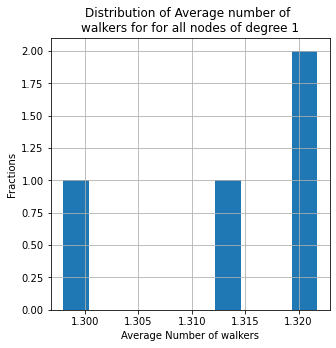

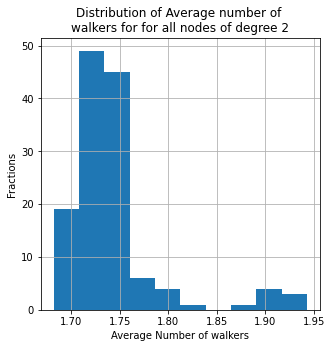

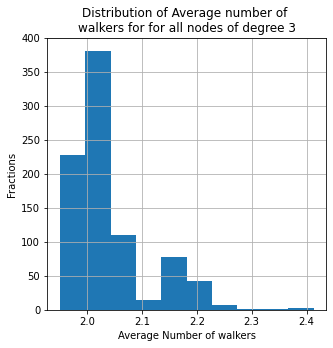

In [ ]:
xlabel,ylabel,title="Average Number of walkers","Fractions","Distribution of Average number of \nwalkers for for all nodes of degree "
for i,j in enumerate(Average_walkers_same_degree):
  bins=10
  HistoGram(j,bins,False,1,xlabel,ylabel,'mid',title+str(i+1),(5,5))

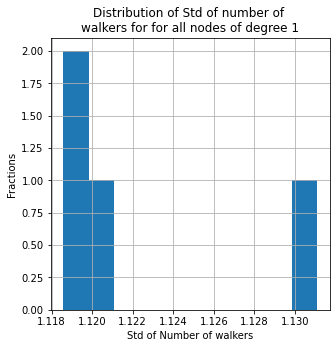

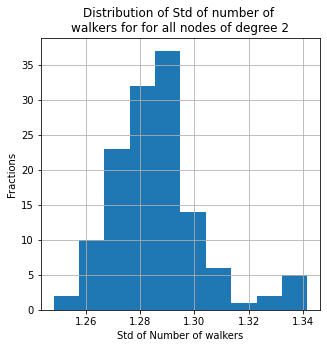

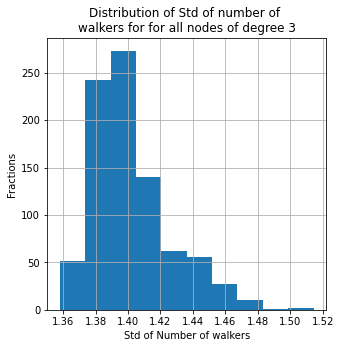

In [ ]:
xlabel,ylabel,title="Std of Number of walkers","Fractions","Distribution of Std of number of \nwalkers for for all nodes of degree "
for i,j in enumerate(Std_walkers_same_degree):
  bins=10
  HistoGram(j,bins,False,1,xlabel,ylabel,'mid',title+str(i+1),(5,5))

#Computing average and standard deviation of walkers degreewise

In [ ]:
Average_walk_degreewise,Std_walk_degreewise=sEE.walkers_statistic_degreewise(nodes_with_same_degrees,dic_mean_walkers,dic_std_walkers)

##Distribution of Average numbers of walkers (Computed degreewise)

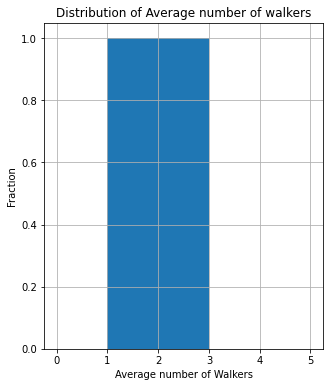

In [ ]:
Avg_walkers =np.array(Average_walk_degreewise)
Avg_walkers_only=Avg_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0,0.5,1.0,1.5,2.0,3,3.5,4.0,4.5,5.0]
fsize=(5,6)
xlabel,ylabel,title="Average number of Walkers","Fraction","Distribution of Average number of walkers"
HistoGram(Avg_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##**Variation of average number of walkers with degree of nodes**

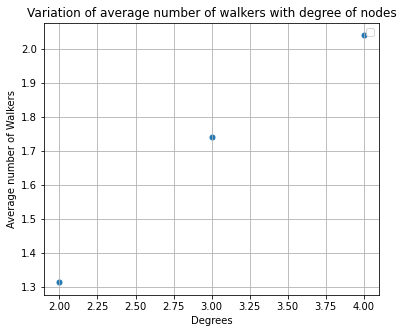

In [ ]:
xarr,yarr=Avg_walkers[::,0],Avg_walkers[::,1]
fig=plt.figure(figsize=(6,5))
xlabel="Degrees"
ylabel="Average number of Walkers"
title="Variation of average number of walkers with degree of nodes"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")
#curve_fitting(xarr,yarr)

##Distribution of standard deviation of numbers of walkers(computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes.

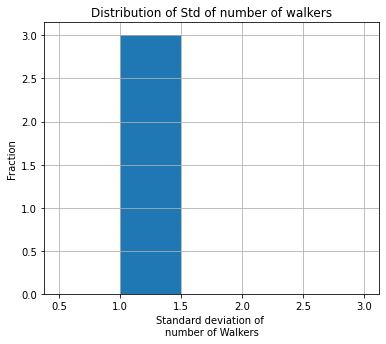

In [ ]:
Std_walkers =np.array(Std_walk_degreewise)
Std_walkers_only=Std_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0.5, 1.0,1.5,2.0,2.5,3.0 ]
fsize=(6,5)
xlabel,ylabel,title="Standard deviation of \nnumber of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(Std_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##**Variation of Std of number of walkers with degree of nodes**

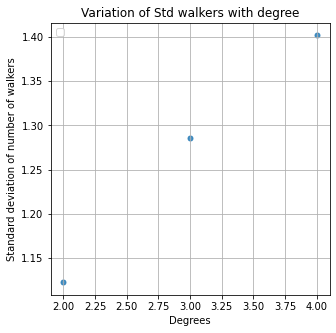

In [ ]:
xarr,yarr=Std_walkers[::,0],Std_walkers[::,1]
fig=plt.figure(figsize=(5,5))
xlabel="Degrees"
ylabel="Standard deviation of number of walkers"
title="Variation of Std walkers with degree"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=0.8,marker="o")
#curve_fitting(xarr,yarr)

##**Variation of Average number of walkers with standard deviation**

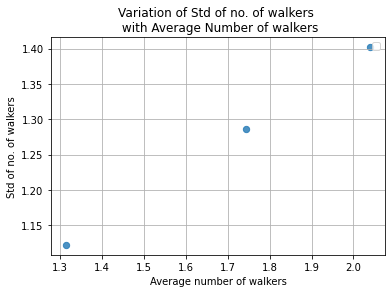

In [ ]:
xarr=Avg_walkers_only
yarr=Std_walkers_only
xlabel,ylabel,title="Average number of walkers","Std of no. of walkers","Variation of Std of no. of walkers \n with Average Number of walkers"
labels="Variation"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
#curve_fitting(xarr,yarr)

#Extreme Event Probablity Computation and plotting

In [ ]:
Scaling_factor=4
threshold_dict,EEP_nodewise,EEP_degreewise=sEE.EE_Prob(nodes,nodes_with_same_degrees,Scaling_factor,TimeSeries_each_node_dict,dic_mean_walkers,dic_std_walkers)

#Distribution of threshold values computed for all nodes

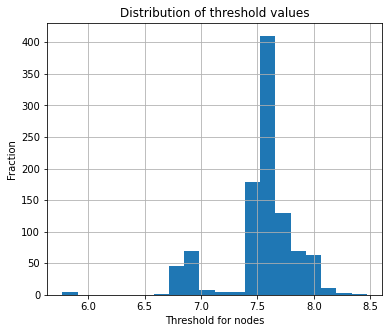

In [ ]:
threshold_values=np.array([threshold_dict[i] for i in threshold_dict])
bins=20
xlabel,ylabel,title="Threshold for nodes","Fraction","Distribution of threshold values"
HistoGram(threshold_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

#Distribution of Probability of Extreme event values(computed for all nodes)

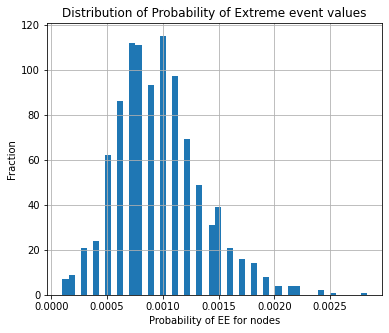

In [ ]:
ExtremeEventN_values=np.array([EEP_nodewise[i] for i in EEP_nodewise])
bins=50
xlabel,ylabel,title="Probability of EE for nodes","Fraction","Distribution of Probability of Extreme event values"
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

#Distribution of Probability of Extreme event values average over nodes of same degree

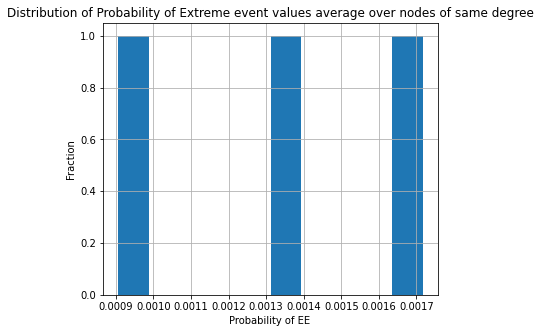

In [ ]:
ExtremeEventD_values=np.array([EEP_degreewise[i] for i in EEP_degreewise])
bins=10
xlabel,ylabel,title="Probability of EE ","Fraction","Distribution of Probability of Extreme event values average over nodes of same degree"
HistoGram(ExtremeEventD_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

#Variation of Probability of Occurrence of extreme event with degree of nodes

Text(0.5, 0, 'Degrees')

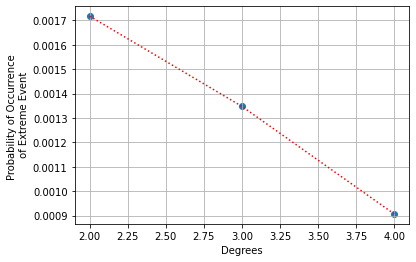

In [ ]:
extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
plt.scatter(xarr,yarr)
plt.plot(xarr,yarr,color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degrees")

#Computing Recurrence Time Interval

In [ ]:
recurrence_Time_each_node=sEE.EE_recurrTime_eachnode(nodes,TimeSeries_each_node_dict,threshold_values)

#Distribution of recurrence time interval for a node

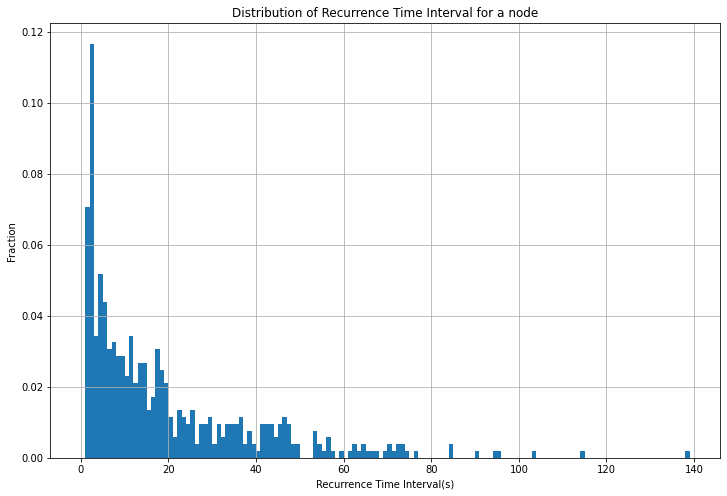

In [ ]:
node=56
mean_walkers =np.array(recurrence_Time_each_node[node])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[i for i in range(0,int(max(mean_walkers))+2)]
fsize=(12,8)
xlabel,ylabel,title="Recurrence Time Interval(s)","Fraction","Distribution of Recurrence Time Interval for a node"
HistoGram(mean_walkers ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Computing average recurrence time for each node and also degreewise

In [ ]:
average_recurrenceT_nodewise,average_recurrenceT_degreewise=sEE.Avg_recurrTime_Node_Degreewise(nodes,nodes_with_same_degrees,recurrence_Time_each_node)

#Distribution of Average Recurrence Time Interval computed for all nodes

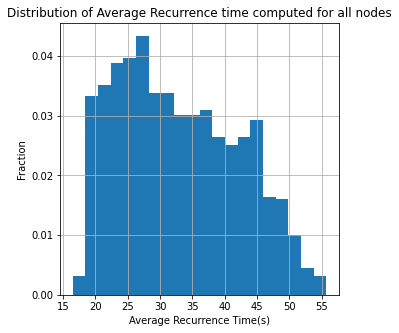

In [ ]:
RecurrenecTime_values_all_nodes=[average_recurrenceT_nodewise[i] for i in average_recurrenceT_nodewise]
bins=20
fsize=(5,5)
xlabel,ylabel,title="Average Recurrence Time(s)","Fraction","Distribution of Average Recurrence time computed for all nodes"
HistoGram(RecurrenecTime_values_all_nodes ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

#Distribution of recurrence time interval computed degreewise

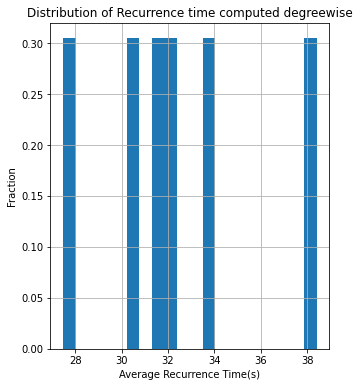

In [ ]:
RecurrenecTime_values_degreewise=[average_recurrenceT_degreewise[i] for i in average_recurrenceT_degreewise]
bins=20
fsize=(5,6)
xlabel,ylabel,title="Average Recurrence Time(s)","Fraction","Distribution of Recurrence time computed degreewise"
HistoGram(RecurrenecTime_values_degreewise ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Variation of Average recurrence time interval with degree

Text(0.5, 0, 'Degrees')

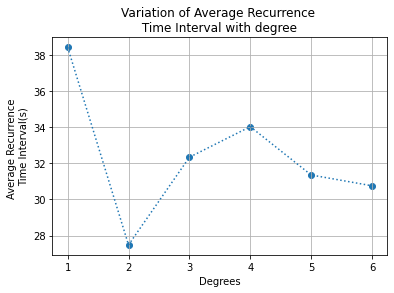

In [ ]:
RecurrenecTime_values_degreewise=np.array([[j,average_recurrenceT_degreewise[j]] for j in average_recurrenceT_degreewise])
xarr,yarr=RecurrenecTime_values_degreewise[::,0],RecurrenecTime_values_degreewise[::,1]
plt.scatter(xarr,yarr)
plt.plot(xarr,yarr,ls=':')
plt.ylabel("Average Recurrence \nTime Interval(s)")
plt.title("Variation of Average Recurrence \n Time Interval with degree ")
plt.grid()
plt.xlabel("Degrees")

#Computing magnitude of difference of Extreme Event

In [ ]:
nodewise_EE_abs_diff_dict=sEE.Abs_diff_mag_EE(nodes,TimeSeries_each_node_dict,threshold_dict)

NameError: ignored

##Distribution of magnitude of difference of Extreme Events for a node

In [ ]:
EE_abs_diff_values_for_a_node=nodewise_EE_abs_diff_dict[44]
fsize=(12,8)
bins=[0,1,2,3,4,5]
xlabel,ylabel,title="Magnitude of difference of Extreme Events","Fraction","Distribution of Magnitude of Difference of Extreme Events for a node"
HistoGram(EE_abs_diff_values_for_a_node ,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Computing Average magnitude of Extreme event difference nodewise and degreewise

In [ ]:
average_abs_diff_mag_EE_nodewise,average_abs_diff_mag_EE_degreewise=Average_Absolute_diff_mag_EE__Node_Degreewise(nodes,Nodes_with_Degree,nodewise_EE_abs_diff_dict)

##Distribution of Average magnitude of difference of Extreme Events computed for all nodes

In [ ]:
average_abs_diff_mag_EE_all_nodes=[average_abs_diff_mag_EE_nodewise[i]for i in average_abs_diff_mag_EE_nodewise]
fsize=(12,8)
bins=30
xlabel,ylabel,title="Average Magnitude of difference of EE","Frequency","Distribution of Average magnitude of difference\n of Extreme Events computed for all nodes"
HistoGram(average_abs_diff_mag_EE_all_nodes ,bins,False,1,xlabel,ylabel,'mid',title,fsize)

#Variation of Average Magnitude of difference of Extreme Event with degree

In [ ]:
average_abs_diff_mag_EE_degreewise_array=np.array([[j,average_abs_diff_mag_EE_degreewise[j]]for j in average_abs_diff_mag_EE_degreewise])
xarr,yarr=average_abs_diff_mag_EE_degreewise_array[::,0],average_abs_diff_mag_EE_degreewise_array[::,1]
xlabel,ylabel,title="Degree","Magnitude of Difference\n of Extreme Event value","Variation of Magnitude of \ndifference of Extreme Event with degree "
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
plt.plot(xarr,yarr,ls=':')